In [40]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

In [45]:
def prob1(alpha, beta, eps, N, x0, x1, x):    
    phi = np.zeros(N + 1)
    phi[0], phi[-1] = alpha, beta
    for ii in range(1, N):
        phi[ii] = -0.5*(x[ii] - x[ii - 1] + x[ii + 1] - x[ii])
    
    funcs = []
    for ii in range(0, N + 1):
        if ii == 0:
            funcs.append(lambda x: )
        if ii == N:
            funcs.append(lambda x: beta)
        else:
            funcs.append(lambda x: )
        
        
    main_d = [1 if ii == 0 or ii == N else -eps/(x[ii] - x[ii - 1]) - eps/(x[ii + 1] - x[ii]) for ii in range(N + 1)]
    main_diag = np.diag(main_d, 0)
    above = [0 if ii == 0 else eps/(x[ii] - x[ii - 1]) - 0.5 for ii in range(N)]
    above_diag = np.diag(above, 1)
    below = [eps/(x[ii + 1] - x[ii]) + 0.5 if ii != N-1 else 0 for ii in range(N)]
    below_diag = np.diag(below, -1)
    A = main_diag + above_diag + below_diag
    
    K = linalg.solve(A, phi)
        
    return K

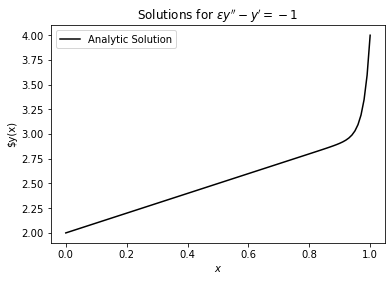

In [47]:
alpha, beta, eps, x0, x1 = 2, 4, 0.02, 0, 1
N = 100
x = np.linspace(x0, x1, N + 1)

res = prob1(alpha, beta, eps, N, x0, x1, x)
analytic_solution = lambda x: alpha + x + (beta - alpha - 1)*((np.exp(x/eps) - 1)/(np.exp(1/eps) - 1))
analytic_solution = np.vectorize(analytic_solution)

plt.plot(x, analytic_solution(x), color = "black", label = "Analytic Solution")
plt.xlabel("$x$")
plt.ylabel("$y(x)")
plt.title("Solutions for $\epsilon y'' - y' = -1$")
plt.legend()
plt.show()